testing simple synthetic data for problem 5 in chap4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
xmin, xmax = -5, 5
ymin, ymax = -5, 5

the domain is divided into two with a linear boundary. a range of sample sizes are compared, from 100 data points to 67600 points  
1. the scores on training and testing datasets are taken as the average of 10 splitting cases (for small sample sizes, the score is highly dependent on the splitting)
2. the 10-fold validation score is used to provide an estimate on average performance of QDA and LDA

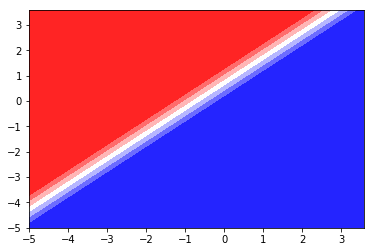

In [3]:
ngrids = [7] + list(np.arange(10, 300, 50))
cnt = 0
qtrains = []; qtests = []; ltrains = []; ltests = []
qscore = []; qstd = []; lscore = []; lstd = []
for iN in ngrids:
    cnt += 1
    
    N = int(iN)
    dx = (xmax - xmin) / N
    dy = (ymax - ymin) / N
    
    z = np.mgrid[xmin:xmax:dx, ymin:ymax:dy]
    
    labels = np.zeros((N, N))
    for ii in range(N):
        for jj in range(N):
            if ii < jj: labels[ii, jj] = 1
    
    x = np.hstack((z[0].reshape(N*N, 1), z[1].reshape(N*N, 1)))
    y = labels.reshape(N*N, 1).ravel()
    
    if cnt == 1:
        plt.contourf(z[0], z[1], labels, cmap='bwr')
    
    qtrains0 = []; qtests0 = []; ltrains0 = []; ltests0 = []
    for irand in range(10):
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = irand)
        qmodel = QDA(store_covariance = True).fit(xtrain, ytrain)#.ravel())
        lmodel = LDA(store_covariance = True).fit(xtrain, ytrain)#.ravel())
        qtrains0.append(qmodel.score(xtrain, ytrain))
        qtests0.append(qmodel.score(xtest, ytest))
        ltrains0.append(lmodel.score(xtrain, ytrain))
        ltests0.append(lmodel.score(xtest, ytest))
    qtrains.append(np.mean(qtrains0)); qtests.append(np.mean(qtests0))
    ltrains.append(np.mean(ltrains0)); ltests.append(np.mean(ltests0))

    qmodel = QDA(store_covariance = True).fit(x, y)
    lmodel = LDA(store_covariance = True).fit(x, y)

    crossScores = cross_val_score(qmodel, x, y, cv = 10)
    qscore.append(np.mean(crossScores))
    qstd.append(np.std(crossScores))
    crossScores = cross_val_score(lmodel, x, y, cv = 10)
    lscore.append(np.mean(crossScores))
    lstd.append(np.std(crossScores))

for very small samples, QDA performs better and has smaller uncertainty; for large sample, LDA has higher scores for both testing and training sets

In [4]:
ngrids2 = np.asarray(ngrids) ** 2

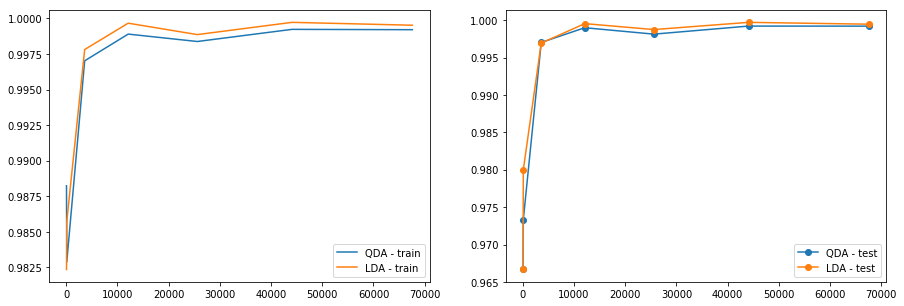

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.plot(ngrids2, qtrains, '-', label = 'QDA - train')
ax2.plot(ngrids2, qtests, '-o', label = 'QDA - test')
ax1.plot(ngrids2, ltrains, '-', label = 'LDA - train')
ax2.plot(ngrids2, ltests, '-o', label = 'LDA - test')
ax1.legend()
ax2.legend()

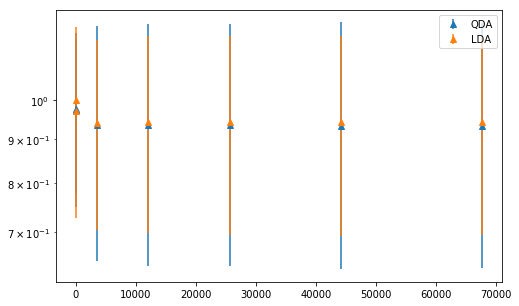

In [6]:
figure, ax1 = plt.subplots(1, 1, figsize = (8, 5))
ax1.errorbar(ngrids2, qscore, np.asarray(qstd) * 3, linestyle='None', marker='^', label = 'QDA')
ax1.errorbar(ngrids2, lscore, np.asarray(lstd) * 3, linestyle='None', marker='^', label = 'LDA')
ax1.legend()
ax1.set_yscale('log')